<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/Pattern_Preprocessing_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pattern preprocessing

> Preprocess the MNIST digits dataset to use as input of a machine learning model

Start from the following notbooks:
Deepnote
* GitHub
* Binarize the images.

> Perform a feature engineering process on the images. (E.g. mean, standard deviation, row sum/range, columns sum/range).
Perform a visualization of the new features grouped by class (digit).

### 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 2. Read Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')

### 3. Preprocess data

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([7, 8, 3, ..., 6, 0, 9])

### 4. Helpers (Functions that will help the model)

If we take a look at the code, then we can see that since the input images are on a based format of 28x28 we are taking this into consideration and setting up:
* a[0]: our zeroth layer (meaning the input layer) to have 784 units
* a[1]: the first layer is going to have 10 units (hidden layer)
* a[2]: and the thrid and final layer is going to have 10 units as well as the second layer (this will be our output layer)

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

the $\mathrm{a}^{[1]}$ layer is going to have a ReLU activation, meaning that we are going to work with a $\mathbf{Z}$ ($\mathrm{a}^{[1]}$ layer not being activated) applied weights and a bias and then running the forward propagation and backward propagation

#### forward Propagation
> $\mathrm{Z}^{[1]} = {W}^{[1]}{X} + {b}^{[1]}$

> $\mathrm{A}^{[1]} = {G}_{ReLU}({Z}^{[1]})$

> $\mathrm{Z}^{[2]} = {W}^{[2]}{A}^{[1]} + {b}^{[2]}$

> $\mathrm{A}^{[2]} = {G}_{softmax}({Z}^{[2]})$

### Backward Propagation

> $\mathrm dZ^{[2]} = A^{[2]} - Y$

> $\mathrm dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

> $\mathrm{dB}^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$

> $\mathrm dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$

> $\mathrm dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$

> $\mathrm dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$



### 5. Model

Within our model we are going to get the forward propagation and backward propagation and with the return values of those functions update our global paramters in each iteration we have set to N steps in order to train it

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

### 6. Training

The model is going to train taking into consideration our split X_train values, and Y_train values, then compare those values and predict to get the training accuracy of our model

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 9 ... 9 1 9] [7 8 3 ... 6 0 9]
0.15195121951219512
Iteration:  10
[0 8 0 ... 4 1 8] [7 8 3 ... 6 0 9]
0.21992682926829268
Iteration:  20
[7 8 3 ... 6 0 8] [7 8 3 ... 6 0 9]
0.3190731707317073
Iteration:  30
[7 2 3 ... 6 0 8] [7 8 3 ... 6 0 9]
0.40495121951219515
Iteration:  40
[7 2 3 ... 6 0 8] [7 8 3 ... 6 0 9]
0.468
Iteration:  50
[7 2 3 ... 6 0 7] [7 8 3 ... 6 0 9]
0.5197560975609756
Iteration:  60
[7 2 3 ... 6 0 7] [7 8 3 ... 6 0 9]
0.5610975609756098
Iteration:  70
[7 8 3 ... 6 0 7] [7 8 3 ... 6 0 9]
0.5948780487804878
Iteration:  80
[7 8 3 ... 6 0 7] [7 8 3 ... 6 0 9]
0.6232926829268293
Iteration:  90
[7 8 3 ... 6 0 7] [7 8 3 ... 6 0 9]
0.6485609756097561
Iteration:  100
[7 8 3 ... 6 0 7] [7 8 3 ... 6 0 9]
0.6693414634146342
Iteration:  110
[7 8 3 ... 6 0 7] [7 8 3 ... 6 0 9]
0.6877560975609756
Iteration:  120
[7 8 3 ... 6 0 7] [7 8 3 ... 6 0 9]
0.7014146341463414
Iteration:  130
[7 8 3 ... 6 0 7] [7 8 3 ... 6 0 9]
0.7148292682926829
Iteration:  140
[7 8 3 ... 

~85% accuracy on training set.


### 7. Testing

With our previous trained model we can now test with real examples from the MNIST Dataset and test in a real situation how good our NN model is

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

We are testing with a couple examples, and the results are astonishing since it can predict incredibly accurate

Prediction:  [7]
Label:  7


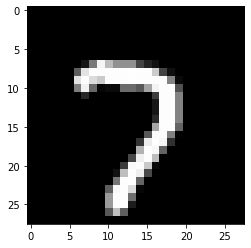

Prediction:  [8]
Label:  8


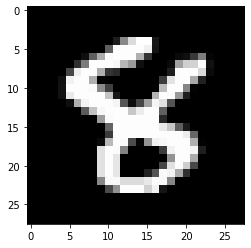

Prediction:  [3]
Label:  3


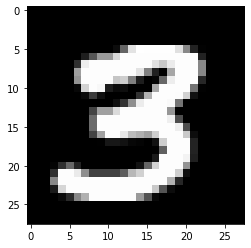

Prediction:  [7]
Label:  7


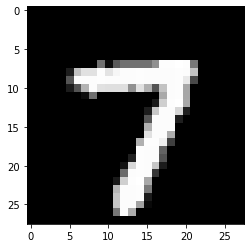

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

#### 7.1 Testing Accuracy

Now if we test with the X_test and Y_test split data we can clearly see we still get a pretty decent accuracy with 83% and as we saw it above the model classifying the digits is doing a decent job

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 2 2 4 9 1 1 3 0 9 9 3 7 7 4 7 8 7 9 3 1 9 8 9 6 9 3 5 5 0 4 2 7 1 6 3 8
 6 7 8 9 7 4 2 6 1 6 8 0 0 2 9 7 5 6 9 2 8 8 8 3 4 2 8 2 9 7 6 6 1 5 4 1 8
 0 0 6 3 3 8 4 8 3 1 3 2 0 8 9 1 1 9 9 7 4 4 5 1 4 6 2 6 8 5 2 8 5 8 9 7 1
 2 0 3 0 5 3 3 6 3 1 5 3 3 0 0 1 3 8 2 5 5 7 9 7 2 8 6 2 8 0 8 9 0 9 3 6 3
 6 5 6 9 1 6 0 2 7 6 7 3 9 3 1 6 8 6 7 6 8 8 9 0 9 9 5 7 2 1 0 1 4 9 7 7 5
 3 9 5 8 6 2 6 3 5 1 6 0 5 5 3 6 7 7 5 9 0 2 1 4 9 0 7 9 2 9 2 8 4 1 3 4 6
 1 7 7 4 7 2 0 5 4 1 6 3 0 1 6 5 4 2 7 0 3 9 1 5 1 6 6 6 3 8 6 4 5 4 8 4 9
 8 1 1 3 4 1 0 3 5 2 9 7 2 7 9 2 4 4 9 5 7 6 6 1 0 0 0 8 5 6 0 5 2 4 8 3 5
 6 5 1 2 6 2 8 4 3 4 0 0 1 1 0 8 6 5 8 8 4 1 0 6 7 4 8 6 7 5 3 9 7 9 9 8 8
 0 3 7 3 5 6 7 2 8 2 2 9 7 5 2 8 1 3 0 3 8 6 9 3 2 3 9 6 2 7 0 8 5 6 6 9 6
 4 3 0 3 5 6 4 2 1 2 1 2 6 4 4 3 1 6 8 8 3 4 9 7 6 4 9 4 2 9 8 9 1 1 3 8 7
 0 9 9 6 3 3 8 8 8 6 5 9 2 2 7 8 4 7 8 8 7 2 2 6 2 7 7 3 4 3 1 7 7 5 0 0 1
 5 1 6 5 7 7 5 3 2 1 9 9 4 5 7 5 7 5 8 1 7 5 5 0 4 3 7 4 6 1 6 6 9 9 6 0 5
 9 2 1 4 5 4 1 6 9 0 4 1 

0.838

### 8. Conclusions

it is amazing how we can create a NN with some simple algebra and how it is so simple to generalized our model from a dataset like MNIST and build something that can predict digits pretty well and not only hand written digits, we can use it towards other datasets and classify pretty much anything doing the proper data preprocessing to give it as an input to our NN